# Water Contamination in Los Angeles 
A "release" is a an exposure of a chemical means that it is emitted to the air or water, or placed in some type of land disposal. In general, chemicals covered by the Toxics Release Inventory (TRI) Program are those that cause one or more of the following:

Cancer or other chronic human health effects.
Significant adverse acute human health effects.
Significant adverse environmental effects.

In this notebook I wanted to display levels of water contamination in Los Angeles by census tract. I plan to do a spatial join of the water contamination data with the population census tract data used in week 7's lab. 

*(Toxics Release Inventory (TRI) Program. (n.d.). Retrieved March 13, 2022, from https://www.epa.gov/toxics-release-inventory-tri-program)*

In [ ]:
#adding our libraries 

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import contextily as ctx

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [ ]:
#converting all data types into floats

In [2]:
water=gpd.read_file("water.csv",GEOM_POSSIBLE_NAMES="geometry", KEEP_GEOM_COLUMNS="NO")
water['Total Population'] = water['Total Population'].astype(float)
water['Drinking Water'] = water['Drinking Water'].astype(float)
water['Latitude'] = water['Latitude'].astype(float)
water['Longitude'] = water['Longitude'].astype(float)

water['Census Tract'] = water['Census Tract'].str.zfill(11)

In [3]:
water.shape

(632, 8)

In [4]:
water.sample()

,Census Tract,Total Population,ZIP,Nearby City,Longitude,Latitude,Drinking Water,geometry
53,06037204910,3263.0,90023,Los Angeles,-118.19557,34.024883,790.2,POINT (-118.19557 34.02488)


In [5]:
water.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 632 entries, 0 to 631
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Census Tract      632 non-null    object  
 1   Total Population  632 non-null    float64 
 2   ZIP               632 non-null    object  
 3   Nearby City       632 non-null    object  
 4   Longitude         632 non-null    float64 
 5   Latitude          632 non-null    float64 
 6   Drinking Water    632 non-null    float64 
 7   geometry          632 non-null    geometry
dtypes: float64(4), geometry(1), object(3)
memory usage: 39.6+ KB


<AxesSubplot:>

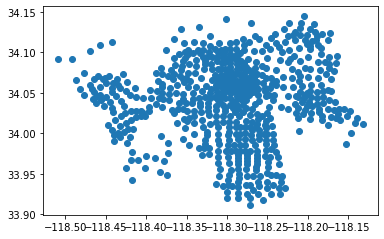

In [4]:
water.plot()

array([[<AxesSubplot:title={'center':'Total Population'}>,
        <AxesSubplot:title={'center':'Longitude'}>],
       [<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Drinking Water'}>]], dtype=object)

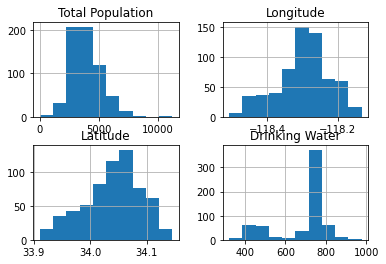

In [7]:
water.hist()

In [9]:
# convert pandas dataframe to geodataframe
water_df = gpd.GeoDataFrame(water, 
                         crs='EPSG:4326',
                         geometry=gpd.points_from_xy(water["Longitude"], water["Latitude"]))

In [10]:
water_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 632 entries, 0 to 631
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Census Tract      632 non-null    object  
 1   Total Population  632 non-null    float64 
 2   ZIP               632 non-null    object  
 3   Nearby City       632 non-null    object  
 4   Longitude         632 non-null    float64 
 5   Latitude          632 non-null    float64 
 6   Drinking Water    632 non-null    float64 
 7   geometry          632 non-null    geometry
dtypes: float64(4), geometry(1), object(3)
memory usage: 39.6+ KB


In [11]:
# get the layers into a web mercator projection
# reproject to web mercator
water_df = water_df.to_crs(epsg=3857)

All of our census tracts that will have a water contamination level attributed to them 

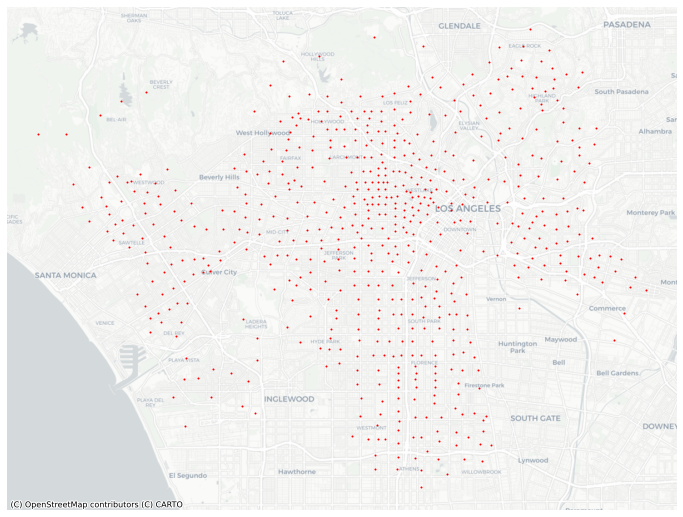

In [12]:
# map it!
fig,ax = plt.subplots(figsize=(12,12))

water_df.plot(ax=ax,
             color='red',
             markersize=1)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

Now we'll be attempting to plot our choropleth 

/opt/conda/lib/python3.9/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/opt/conda/lib/python3.9/site-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 3
  Warn("Warning: setting k to %d" % k_q, UserWarning)


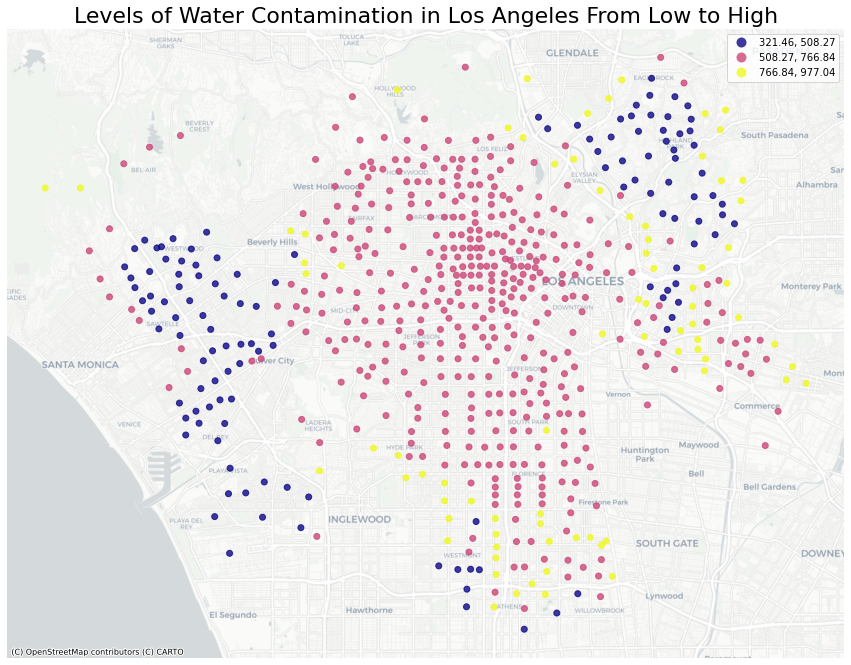

In [13]:
fig,ax = plt.subplots(figsize=(15,15))

water_df.plot(ax=ax,
        column='Drinking Water',
        legend=True,
        alpha=0.8,
        cmap='plasma',
        scheme='quantiles')

ax.axis('off')
ax.set_title('Levels of Water Contamination in Los Angeles From Low to High',fontsize=22)
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)


Let's try again 

In [15]:
# get the bounding box coordinates for the arrest data
minx, miny, maxx, maxy = water_df.geometry.total_bounds
print(minx)
print(maxx)
print(miny)
print(maxy)

-13192320.012249991
-13150444.970530234
4016854.8680640827
4048324.5404119757


Let's clean up our data 

In [26]:
gdf_tracts = gpd.read_file('data/tracts.geojson')
# trim the data to the bare minimum columns
gdf_tracts = gdf_tracts[['geoid', 'name', 'geometry']]
gdf_tracts['geoid'] = gdf_tracts['geoid'].str.lstrip('14000US').str.zfill(11)
gdf_tracts.sample()

,geoid,name,geometry
583,06037211320,"Census Tract 2113.20, Los Angeles, CA","MULTIPOLYGON (((-118.29666 34.07096, -118.2966..."


In [17]:
gdf_tracts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geoid     1005 non-null   object  
 1   name      1005 non-null   object  
 2   geometry  1005 non-null   geometry
dtypes: geometry(1), object(2)
memory usage: 23.7+ KB


In [27]:
# get the layers into a web mercator projection
# reproject to web mercator
gdf_tracts = gdf_tracts.to_crs(epsg=3857)

In [20]:
# Do the spatial join
join = gpd.sjoin(water_df, gdf_tracts, how='left')
join.head()

,Census Tract,Total Population,ZIP,Nearby City,Longitude,Latitude,Drinking Water,geometry,index_right,geoid,name
0,06037204920,2639.0,90023,Los Angeles,-118.197497,34.017500,766.84,POINT (-13157685.235 4031152.144),1004.0,6000US0644000,"Los Angeles, CA"
0,06037204920,2639.0,90023,Los Angeles,-118.197497,34.017500,766.84,POINT (-13157685.235 4031152.144),527.0,06037204920,"Census Tract 2049.20, Los Angeles, CA"
1,06037226002,1754.0,90021,Los Angeles,-118.247769,34.032620,766.84,POINT (-13163281.388 4033182.883),1004.0,6000US0644000,"Los Angeles, CA"
1,06037226002,1754.0,90021,Los Angeles,-118.247769,34.032620,766.84,POINT (-13163281.388 4033182.883),702.0,06037226002,"Census Tract 2260.02, Los Angeles, CA"
2,06037206050,2010.0,90023,Los Angeles,-118.224453,34.029904,766.84,POINT (-13160685.918 4032818.056),1004.0,6000US0644000,"Los Angeles, CA"


In [21]:
#join = join[join.geoid != "16000US0644000"] 
#join.head()
join = join[join.geoid != "6000US0644000"] 
join.head()

,Census Tract,Total Population,ZIP,Nearby City,Longitude,Latitude,Drinking Water,geometry,index_right,geoid,name
0,06037204920,2639.0,90023,Los Angeles,-118.197497,34.017500,766.84,POINT (-13157685.235 4031152.144),527.0,06037204920,"Census Tract 2049.20, Los Angeles, CA"
1,06037226002,1754.0,90021,Los Angeles,-118.247769,34.032620,766.84,POINT (-13163281.388 4033182.883),702.0,06037226002,"Census Tract 2260.02, Los Angeles, CA"
2,06037206050,2010.0,90023,Los Angeles,-118.224453,34.029904,766.84,POINT (-13160685.918 4032818.056),534.0,06037206050,"Census Tract 2060.50, Los Angeles, CA"
3,06037531302,6142.0,90023,Los Angeles,-118.182724,34.016902,824.22,POINT (-13156040.667 4031071.764),NaN,NaN,NaN
4,06037532302,4819.0,90023,Los Angeles,-118.175171,34.009689,677.20,POINT (-13155199.871 4030103.029),NaN,NaN,NaN


In [25]:
water_by_tract = join[['geoid', 'Drinking Water', 'Total Population']]
water_by_tract.sample()

,geoid,Drinking Water,Total Population
282,06037234600,735.85,4622.0


In [28]:
gdf_tracts=gdf_tracts.merge(water_by_tract, on='geoid')
gdf_tracts.head()

,geoid,name,geometry,Drinking Water,Total Population
0,06037143700,"Census Tract 1437, Los Angeles, CA","MULTIPOLYGON (((-13177453.072 4046470.540, -13...",722.13,3916.0
1,06037181000,"Census Tract 1810, Los Angeles, CA","MULTIPOLYGON (((-13161147.772 4048542.321, -13...",665.87,6523.0
2,06037181300,"Census Tract 1813, Los Angeles, CA","MULTIPOLYGON (((-13161238.609 4046824.373, -13...",866.81,4058.0
3,06037181400,"Census Tract 1814, Los Angeles, CA","MULTIPOLYGON (((-13160075.209 4047615.729, -13...",486.40,4669.0
4,06037181500,"Census Tract 1815, Los Angeles, CA","MULTIPOLYGON (((-13158134.576 4046743.008, -13...",659.44,3918.0


In [30]:
#merged = join.set_index('geoid').join(join.set_index('geoid'))

Another try! 

/opt/conda/lib/python3.9/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/opt/conda/lib/python3.9/site-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 3
  Warn("Warning: setting k to %d" % k_q, UserWarning)


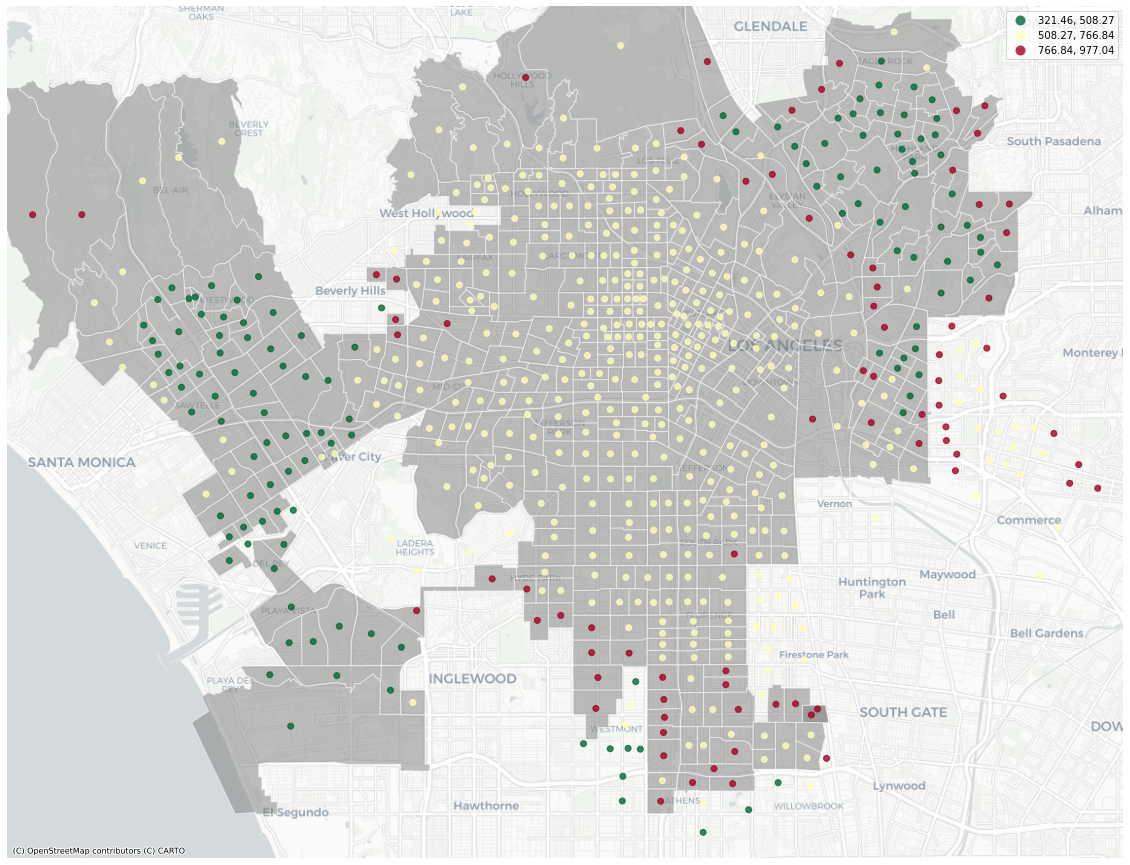

In [29]:
# set up the plot canvas with plt.subplots
fig, ax = plt.subplots(figsize=(20, 20))

# block groups
gdf_tracts.plot(ax=ax, # this puts it in the ax plot
        color='gray', 
        edgecolor='white',
        alpha=0.5)

# water
join.plot(ax=ax,
        column='Drinking Water',
        legend=True,
        alpha=0.8,
        cmap='RdYlGn_r',
        scheme='quantiles')


# use the bounding box coordinates to set the x and y limits
ax.set_xlim(minx - 1000, maxx + 1000) # added/substracted value is to give some margin around total bounds
ax.set_ylim(miny - 1000, maxy + 1000)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

After speaking with Chris, Ryan and Yoh I believe I finally understood that because my water data was being represented as a point and not a polygon, I was not getting a choropleth. However after speaking with Yoh we agreed that the visual may allow for better represenation and weight of each tract without giving too much weight to one as traditional choropleths do. By looking at the findings we can see that most tracts seems to lie within mid level contamination and are centered in the middle. The tracts with lowest levels of contamination lie only on the outsides surrounding areas of higher levels. The highest levels of contamination seem to lie on the fringes oddly enough alongside the lowest levels. While their locations seems pretty random, the tighest clusters seems to be in the south tip of LA and East LA. The map leaves much more to be known, would be really interesting to understand what is occuring in these different spaces that leads to differences in water contamination. 